# Final Project Data Exploration
### Authors: Sinclaire Schuetze and Valerie Tseng
#### Date: March 31, 2022

**Table of Contents**

1. [Initial Exploration of Data](#sec1)
2. [Time Series Data](#sec2)
3. [Topic Modeling](#sec3)
4. [Using t-SNE](#sec4)

<a id="sec1"></a>
## 1. Exploring Data

We begin with reading in the csv file that was created in our data collection notebook which contains the posts and their comments.

In [2]:
import pandas as pd

In [3]:
posts = pd.read_csv('redditPosts.csv')

In [5]:
from ast import literal_eval

In [6]:
import pandas as pd
import praw
from psaw import PushshiftAPI    #library Pushshift
import datetime as dt            #library for date management
import p                         #library for data manipulation
import matplotlib.pyplot as plt  #library for plotting

In [7]:
api = PushshiftAPI()  

In [8]:
reddit = praw.Reddit(client_id='MXxrtdoyASQVpC98DW9TTw', client_secret='xsj3cNAMWAmkIeZEDxNubYR2iq9tVw', user_agent='CS315Project')

Version 7.5.0 of praw is outdated. Version 7.6.0 was released 4 days ago.


Analyzes if post is YTA (you're the asshole), NTA (you're not the asshole), or ESH (everyone sucks here) based on majority of what comments vote and determines which posts are controversial.

In [9]:
posts["commentVote"] = ""
posts["controversy"] = ""
controversy = []
ntaPercents = []
ytaPercents = []
eshPercents = []
ratingPercents = []
for ind in posts.index:
    numNTA = 0
    numYTA = 0
    numESH = 0
    comments = literal_eval(posts['comments'][ind])
    for c in comments:
        #for each post sums how many times nta, yta, and esh appear
        if "nta" in c.lower():
            numNTA = numNTA + 1
        elif "yta" in c.lower():
            numYTA = numYTA + 1
        elif "esh" in c.lower():
            numESH = numESH + 1
            
    #if yta is greater than nta and esh, post identified as yta
    if numYTA > numNTA and numYTA > numESH:
        posts['commentVote'][ind] = "YTA"
        majorityVote = numYTA
    #if nta is greater than yta and esh, post identified as nta
    elif numNTA > numYTA and numNTA > numESH:
        posts['commentVote'][ind] = "NTA"
        majorityVote = numNTA
    #otherwise post must be esh
    else:
        posts['commentVote'][ind] = "ESH"
        majorityVote = numESH
    #if percent of majority vote is <40%, post deemed controversial
    if (numYTA + numNTA + numESH)>0 and majorityVote/(numYTA + numNTA + numESH) < 0.4:
        posts["controversy"][ind] = "yes"
    #creates new dataframe containing only controversial posts
    controversy = posts[posts.controversy == 'yes']
    

    totalNumVotes = numYTA + numNTA + numESH
    if(totalNumVotes!= 0):
        
        percentNTA = numNTA/totalNumVotes
        percentYTA = numYTA/totalNumVotes
        percentESH = numESH/totalNumVotes
        
        ratingPercents.append((percentNTA, percentYTA, percentESH))
        ntaPercents.append(percentNTA)
        ytaPercents.append(percentYTA)
        eshPercents.append(percentESH)
        

In [10]:
posts

,id,selftext,title,comments,commentVote,controversy
0,tq0omw,Me (m32) and my girlfriend (f32) have been dat...,"AITA for ""parenting"" my step daughter and lett...","['NTA\n\nThis doesn\'t sound like a ""parenting...",NTA,
1,tq0odl,I booked a tutoring session at a late time. I ...,AITA for booking a tutoring session late despi...,"['What does ""hours"" mean in this context? It c...",NTA,
2,tq0no3,I (23M) am a graduate student at an ivy league...,AITA for not calling my cousin last week when ...,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,
3,tq0nnf,I know the title sounds bad enough but here me...,AITA for implying my mom looks like monkey,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,
4,tq0n2h,Me and my husband of 4 years have been going t...,AITA my husband went out with our friend group...,"[""YTA. What's the point of being separated if ...",YTA,
...,...,...,...,...,...,...
5832,tid8o4,"For the past 8 months, I've had a housemate an...",AITA for trying to get my roommate evicted due...,"['NTA OP, this dude’s constant ongoing referen...",NTA,
5833,tid7t7,I am either a huge asshole or been driven craz...,AITA for caring about this? Give it to me stra...,['So this is pretty toxic. \nYou’ve ended th...,NTA,
5834,tid7r5,I’m in 11th grade and he’s in 9th.\n\nBoth of ...,WIBTA if I hang out with a 14 year old outside...,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,
5835,tid4kk,I’m in 11th grade and he’s in 9th.\n\nBoth of ...,WIBTA if I hung out with a 14 year old outside...,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,


We will then create a graph that shows the breakdown for each post of the percent ratings.

In [45]:
ratingPercents.sort()

In [46]:
ntaPercents = []
ytaPercents = []
eshPercents = []

for posts in ratingPercents:
    ntaPercents.append(posts[0])
    ytaPercents.append(posts[1])
    eshPercents.append(posts[2])

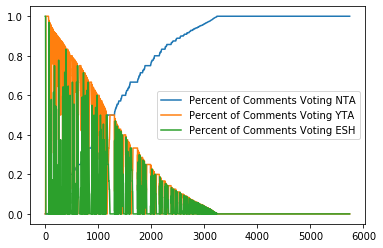

In [47]:
import matplotlib.pyplot as plt

x = range(1, 5742, 1)
y1 = ntaPercents
y2 = ytaPercents
y3 = eshPercents


# plot lines
plt.plot(x, y1, label = "Percent of Comments Voting NTA")
plt.plot(x, y2, label = "Percent of Comments Voting YTA")
plt.plot(x, y3, label = "Percent of Comments Voting ESH")
plt.legend()
plt.show()

<a id="sec2"></a>
## 2. Time Series Data of "Controversial" Posts

For 30 of the controversial posts, plots ratings against time series data of the comments. This will be utilized to analyze the confidence effect.

In [48]:
controversy['timeStamps'] = ''
controversy["allVotes"] = ""

ntaPercents = []
ytaPercents = []
eshPercents = []
ratingPercents = []

for post in controversy.index:
    postId = controversy['id'][post]
    postComments = [] #list to collect comments for each post
    commentTime = []
    allVotes = []
    submission = reddit.submission(id=postId)
    submission.comments.replace_more(limit=0) #gets around "more commments" at end of reddit post
    
    numNTA = 0
    numYTA = 0
    numESH = 0
    
    for top_level_comment in submission.comments[1:]: #first comment is always given from subreddit
        #creates list of vote of each comment
        if("nta" in top_level_comment.body.lower() or "yta" in top_level_comment.body.lower() or "esh" in top_level_comment.body.lower()):
            if("nta" in top_level_comment.body.lower()): 
                allVotes.append("nta") #comment voted nta, added to list
                numNTA = numNTA + 1
      
            elif("yta" in top_level_comment.body.lower()): 
                allVotes.append("yta") #comment voted yta, added to list
                numYTA = numYTA + 1
                
            else:
                allVotes.append("esh") #comment voted esh, added to list
                numESH = numESH + 1
                
            postComments.append(top_level_comment.body) #adds comment to list
            commentTime.append(top_level_comment.created_utc) #adds timestamp to list  
            
            
    controversy['comments'][post] = postComments
    controversy['timeStamps'][post] = commentTime
    controversy['allVotes'][post] = allVotes
    
    totalNumVotes = numYTA + numNTA + numESH
    if(totalNumVotes!= 0):
        
        percentNTA = numNTA/totalNumVotes
        percentYTA = numYTA/totalNumVotes
        percentESH = numESH/totalNumVotes
        
        ratingPercents.append((percentNTA, percentYTA, percentESH))
        ntaPercents.append(percentNTA)
        ytaPercents.append(percentYTA)
        eshPercents.append(percentESH)

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

We first again create a graph with the percent ratings for each post, but this time only the controversial posts.

In [49]:
ratingPercents.sort()

In [50]:
ntaPercents = []
ytaPercents = []
eshPercents = []

for posts in ratingPercents:
    ntaPercents.append(posts[0])
    ytaPercents.append(posts[1])
    eshPercents.append(posts[2])

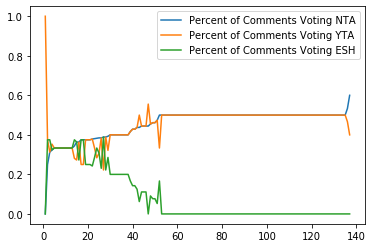

In [52]:
import matplotlib.pyplot as plt

x = range(1, 138, 1)
y1 = ntaPercents
y2 = ytaPercents
y3 = eshPercents


# plot lines
plt.plot(x, y1, label = "Percent of Comments Voting NTA")
plt.plot(x, y2, label = "Percent of Comments Voting YTA")
plt.plot(x, y3, label = "Percent of Comments Voting ESH")
plt.legend()
plt.show()

In [53]:
controversy = controversy.drop(columns=['selftext', 'title','comments','commentVote','controversy']) #unnecessary columns

In [54]:
len(controversy)

137

In [55]:
controversy = controversy.reset_index(drop = True)

In [56]:
controversy

,id,timeStamps,allVotes
0,tq0a9w,"[1648438423.0, 1648438451.0, 1648438575.0, 164...","[nta, nta, yta, yta]"
1,tpx82i,"[1648433159.0, 1648428362.0, 1648428514.0, 164...","[yta, yta, nta, nta, nta, yta]"
2,tpwzv2,"[1648427550.0, 1648427056.0, 1648427686.0, 164...","[nta, nta, yta, yta]"
3,tpv97q,"[1648421341.0, 1648421432.0, 1648421549.0, 164...","[yta, yta, yta, nta, nta, nta, nta, yta, nta, ..."
4,tpu0ei,"[1648418147.0, 1648418016.0, 1648418096.0, 164...","[esh, yta, esh, esh, esh, esh, yta, esh, yta, ..."
...,...,...,...
132,tik0yb,"[1647779435.0, 1647782246.0]","[nta, yta]"
133,tig3ux,"[1647763524.0, 1647762944.0]","[yta, nta]"
134,tif7iu,"[1647760067.0, 1647759243.0, 1647785688.0, 164...","[esh, yta, esh, esh, yta, nta, yta, nta, yta, ..."
135,tif2iz,"[1647764178.0, 1647758711.0, 1647759212.0, 164...","[nta, yta, yta, yta, esh, esh, nta, nta]"


In [120]:
from datetime import datetime
controversy['dateTime'] = ''

for post in controversy.index:
    controversy['dateTime'][post] = []
    for time in controversy['timeStamps'][post]:
        newTime = str(datetime.fromtimestamp(time))
        justTime = newTime.split()[1]
        controversy['dateTime'][post].append(justTime)
        

In [121]:
controversy

,id,timeStamps,allVotes,dateTime,voteTuple
0,tq0a9w,"[1648438423.0, 1648438451.0, 1648438575.0, 164...","[nta, nta, yta, yta]","[23:33:43, 23:34:11, 23:36:15, 23:36:52]",
1,tpx82i,"[1648433159.0, 1648428362.0, 1648428514.0, 164...","[yta, yta, nta, nta, nta, yta]","[22:05:59, 20:46:02, 20:48:34, 20:50:52, 20:37...",
2,tpwzv2,"[1648427550.0, 1648427056.0, 1648427686.0, 164...","[nta, nta, yta, yta]","[20:32:30, 20:24:16, 20:34:46, 20:37:56]",
3,tpv97q,"[1648421341.0, 1648421432.0, 1648421549.0, 164...","[yta, yta, yta, nta, nta, nta, nta, yta, nta, ...","[18:49:01, 18:50:32, 18:52:29, 18:49:24, 18:47...",
4,tpu0ei,"[1648418147.0, 1648418016.0, 1648418096.0, 164...","[esh, yta, esh, esh, esh, esh, yta, esh, yta, ...","[17:55:47, 17:53:36, 17:54:56, 18:24:48, 18:31...",
...,...,...,...,...,...
132,tik0yb,"[1647779435.0, 1647782246.0]","[nta, yta]","[08:30:35, 09:17:26]",
133,tig3ux,"[1647763524.0, 1647762944.0]","[yta, nta]","[04:05:24, 03:55:44]",
134,tif7iu,"[1647760067.0, 1647759243.0, 1647785688.0, 164...","[esh, yta, esh, esh, yta, nta, yta, nta, yta, ...","[03:07:47, 02:54:03, 10:14:48, 04:32:51, 02:57...",
135,tif2iz,"[1647764178.0, 1647758711.0, 1647759212.0, 164...","[nta, yta, yta, yta, esh, esh, nta, nta]","[04:16:18, 02:45:11, 02:53:32, 02:59:55, 03:31...",


This is the code that actually creates the time series plots.

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


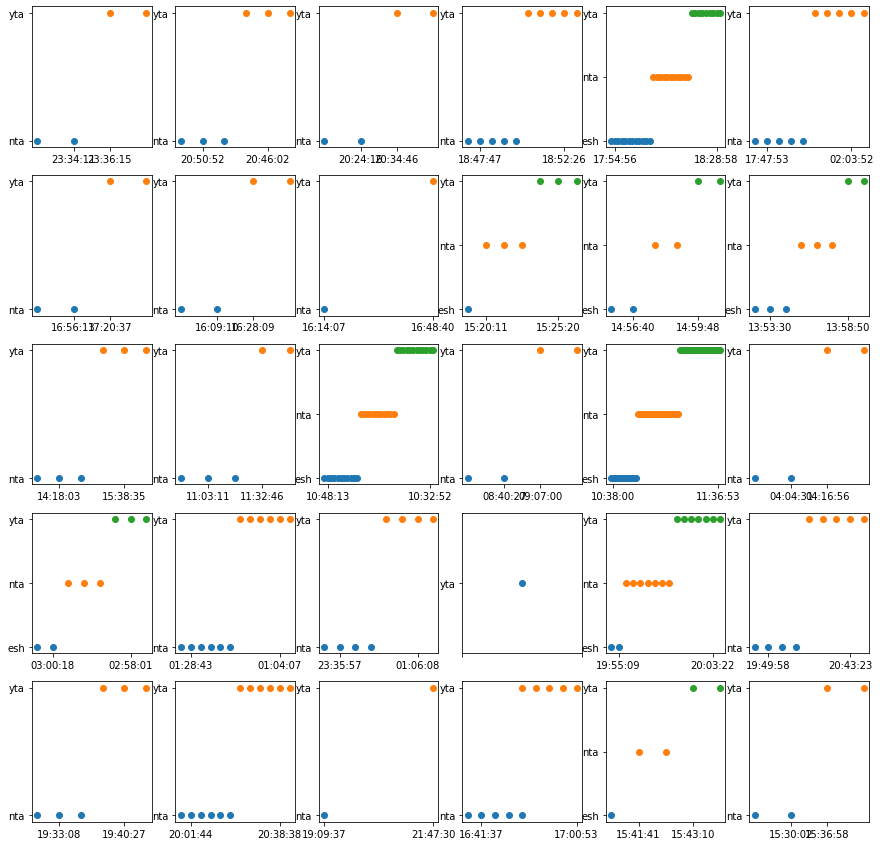

In [122]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
controversy['voteTuple'] = ''

fig, ax = plt.subplots(5,6,figsize=(15,15))
#colors to denote ratings
colors = {'yta':'red', 'nta':'green', 'esh':'yellow'}

# i denotes the row index, while j denotes the column index
i = 0 
#creates small multiples of time series plots
for j in range(30):
    timeTuple = tuple(controversy["dateTime"][j])
    voteTuple = tuple(controversy["allVotes"][j])
    
    
    if (j != 0) and (j % 6 == 0):
        i += 1
    
    data = pd.DataFrame({"X Value": timeTuple, "Y Value": voteTuple, "Category": voteTuple})
    groups = data.groupby("Category")
    
    for name, group in groups:
        timeList = list(timeTuple)
        numTimes = len(timeList)
        ax[i,j%6].plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
        ax[i,j%6].set_xticks([1,numTimes-2], minor=False)

### End of times series analysis, continuation of general exploration of data

In data collection, posts were removed if they had no comments or were removed from Reddit, so we were left with 5,837 posts.

In [18]:
posts

(1.0, 0.0, 0.0)

In [11]:
#groups by what post was voted by so we can see if we have enough of each type to complete analysis
numPerType = posts.groupby('commentVote').count()

In [12]:
numPerType

,id,selftext,title,comments,controversy
commentVote,,,,,
ESH,347,347,347,347,347
NTA,4538,4538,4538,4538,4538
YTA,952,952,952,952,952


NTA definitely has an overhwelming number of posts, but there are still enough in both yta and esh for us to evaluate.

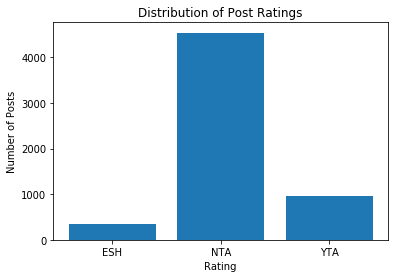

In [13]:
import matplotlib.pyplot as plt

plt.bar(['ESH','NTA','YTA'],numPerType['comments'])
plt.title('Distribution of Post Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Posts')
plt.show()

Here we will provide an example of what an ESH, YTA, and NTA post looks like

In [14]:
posts['title'][13]

'AITA for the way I reacted to my brother hiding/stealing my new shoes?'

In [15]:
posts['selftext'][13] #example of ESH

'I’m 18 and he’s 14. I’m also a male.\n\nMy brother is sometimes really annoying. I was gonna go out and play tennis with my friend and I was really attached to my new shoes. Bought them myself, and never wanted to wear another pair.\n\nI couldn’t find them anywhere. I knew exactly where I left them. I asked my brother if he took them, because it seemed to be the only possible explanation.\n\nHe giggled. I told him to give it back to me. He said no. I looked around and I couldn’t find it. He said I would never find it.\n\nI told him,”I’m not gonna tell you again, give me my fucking shoes.”\n\nHe continually refused. I approached him in a threatening manner and started clenching my fists together.\n\nHe still said that no matter what I try, I’ll never find them, and that I can suck it up and deal with it.\n\nHe ran away, and I immediately ran after him (slid a little because I had socks on), and I grabbed. He said “let me go.”\n\nI pinned against to the wall, and I put my fist up and cl

In [16]:
posts['title'][0]

'AITA for "parenting" my step daughter and letting her skip school?'

In [17]:
posts['selftext'][0] #example of NTA

'Me (m32) and my girlfriend (f32) have been dating for a year. My girlfriend has a daughter, Emika (f16) and recently they moved to my place. \n\nMy girlfriend works every day at her office while i still work from home. My step daughter doesn\'t spend much time at home, she is usually out with her friends, so we don\'t have a really close relationship.\n\nLast friday my girlfriend went to work as always and i stayed home.\nMy step daughter came to me in the morning and told me her stomach was hurting, she was literally crying in pain so i called my girlfriend to see what i should do, i called a few times but she wouldn\'t pick up.\nAs i said, my step daughter was crying and she never skips school so i thought that her staying home one day wouldn\'t be a big deal. Huge mistake. When my girlfriend came home she went crazy! Started screaming at me about how i\'m not allowed to make parenting choices for her, how her daughter is not allowed to skip school, how i should have asked her first

In [18]:
posts['title'][4]

'AITA my husband went out with our friend group and never told me.'

In [19]:
posts['selftext'][4] #example of YTA

'Me and my husband of 4 years have been going through a rough patch. We decided to separate for a while. It was a Friday night when he packed his bags and said he was headed to stay with his parents. The separation only lasted a couple days and he moved back in. About two weeks later I went out shopping with the girls in our friend group (because the men were out of town riding dirt bikes and we needed a get away from the kids) while we were out shopping the girls were telling me all about this night a couple weeks ago where they went to dinner, drinking, and to get ice cream. They told me stories about my husband being there. I was confused and realized he went out with our friend group while we were separated. He never told me about it. They assumed he did. When I confronted him about it he said "I didn\'t think it was a big deal because we were separated and we can do what I want when we are separated" I was very upset and still am. AITA for being so mad at him?'

We then calculate the number of comments per post and sum them to determine if we have enough comments for analysis.

In [20]:
posts["numComments"] = 0
for ind in posts.index:
    posts['numComments'][ind] = len(posts['comments'][ind])
posts.head()

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,selftext,title,comments,commentVote,controversy,numComments
0,tq0omw,Me (m32) and my girlfriend (f32) have been dat...,"AITA for ""parenting"" my step daughter and lett...","['NTA\n\nThis doesn\'t sound like a ""parenting...",NTA,,100240
1,tq0odl,I booked a tutoring session at a late time. I ...,AITA for booking a tutoring session late despi...,"['What does ""hours"" mean in this context? It c...",NTA,,4533
2,tq0no3,I (23M) am a graduate student at an ivy league...,AITA for not calling my cousin last week when ...,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,,4633
3,tq0nnf,I know the title sounds bad enough but here me...,AITA for implying my mom looks like monkey,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,,3761
4,tq0n2h,Me and my husband of 4 years have been going t...,AITA my husband went out with our friend group...,"[""YTA. What's the point of being separated if ...",YTA,,4996


Total number of comments is over 62 million, so there are more than enough comments for our analysis.

In [21]:
posts['numComments'].sum()

62988957

<a id="sec3"></a>
## 3. General Topic Modeling

Topic modeling to see what are the most common topics within the posts' titles.

In [22]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [24]:
#converting dataframe column into correct format for sklearn
postTitles = posts['title'].to_numpy()
docs_raw = postTitles.tolist()

In [25]:
# Create the TF vector represetnation, this only counts the terms in each document

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(docs_raw)
print(dtm_tf.shape)

(5837, 472)


In [26]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)
print(dtm_tfidf.shape)

(5837, 472)


/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning,


In [27]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)

lda_tf

LatentDirichletAllocation(random_state=0)

In [28]:
# the TF representation model

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.171091 -0.181842       1        1  11.566091
9      0.162579 -0.158670       2        1  10.941061
4      0.088685 -0.196039       3        1  10.760543
6      0.176771  0.142381       4        1  10.399111
7     -0.152753  0.136357       5        1   9.941114
3     -0.177779  0.160755       6        1   9.604328
0     -0.241958 -0.039818       7        1   9.583228
2      0.016206 -0.068892       8        1   9.451934
8      0.165612  0.008605       9        1   9.227963
5      0.133730  0.197163      10        1   8.524627, topic_info=          Term        Freq       Total Category  logprob  loglift
158     friend  768.000000  768.000000  Default  30.0000  30.0000
458      wibta  626.000000  626.000000  Default  29.0000  29.0000
406    telling  643.000000  643.000000  Default  28.0000  28.0000
443    wanting  509.000000  509.000000  Default  27.0000  27.0000
374     sister  297.000000  297.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
27         bed   15.407243   23.014546  Topic10  -4.6496   2.0609
103  daughters   14.725610   20.072157  Topic10  -4.6949   2.1525
271      money   21.894206   77.127927  Topic10  -4.2982   1.2030
140     family   16.735858  184.489504  Topic10  -4.5669   0.0622
297    parents   15.382028  143.480550  Topic10  -4.6512   0.2292

[448 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1         5  0.938143     accepting
2         2  0.844527  accidentally
2        10  0.105566  accidentally
3        10  0.922885       account
4         4  0.311211        advice
...     ...       ...           ...
468       8  0.974715          year
470       4  0.719249       yelling
470       6  0.282058       yelling
471       2  0.859059       younger
471       7  0.101066       younger

[717 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 5, 7, 8, 4, 1, 3, 9, 6])

<a id="sec4"></a>
## 4. Using t-SNE
This will allow us to visualize titles in 2D format as well as analyze whether there is a relationship between ratings and title.

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [31]:
posts.head()

,id,selftext,title,comments,commentVote,controversy,numComments
0,tq0omw,Me (m32) and my girlfriend (f32) have been dat...,"AITA for ""parenting"" my step daughter and lett...","['NTA\n\nThis doesn\'t sound like a ""parenting...",NTA,,100240
1,tq0odl,I booked a tutoring session at a late time. I ...,AITA for booking a tutoring session late despi...,"['What does ""hours"" mean in this context? It c...",NTA,,4533
2,tq0no3,I (23M) am a graduate student at an ivy league...,AITA for not calling my cousin last week when ...,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,,4633
3,tq0nnf,I know the title sounds bad enough but here me...,AITA for implying my mom looks like monkey,['^^^^AUTOMOD ***Thanks for posting! This com...,NTA,,3761
4,tq0n2h,Me and my husband of 4 years have been going t...,AITA my husband went out with our friend group...,"[""YTA. What's the point of being separated if ...",YTA,,4996


In [32]:
corpus_text = 'n'.join(posts['title'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [33]:
#Word2Vec models to create matrices of numebers of posts which is required for t-SNE
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5)
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg = 1)

In [34]:
#t-SNE
import numpy as np
from sklearn.manifold import TSNE
X = np.array(model1.syn1neg)
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)

In [35]:
X_embedded

array([[-48.2168  ,  28.32614 ],
       [-48.210445,  28.30224 ],
       [-48.233727,  28.316755],
       ...,
       [ 50.933838, -14.415451],
       [ 43.800396, -18.953823],
       [ 33.96452 , -59.336933]], dtype=float32)

In [36]:
df_subset = pd.DataFrame()

df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:529: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  float_data = data.astype(np.float)
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:533: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.f

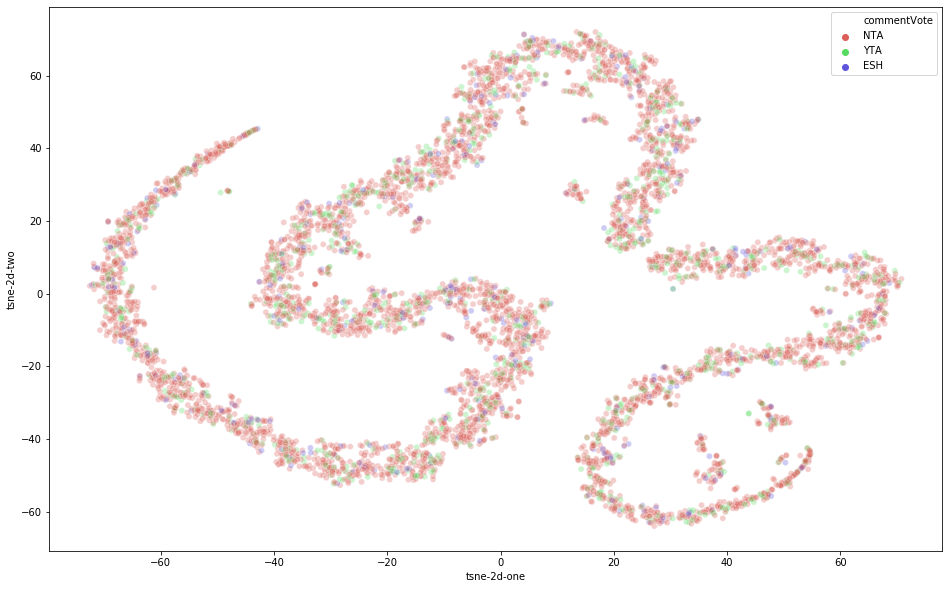

In [37]:
#creates t-SNE visualization
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df_subset['tsne-2d-one'], 
    y=df_subset['tsne-2d-two'],
    hue=posts['commentVote'],
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [38]:
# Run in python console
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sinclaireschuetze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We then explore the results of our topic modeling more to gain a better understanding of the popularity of certain topics within the subreddit. This code was used from the tutorial provided by https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [39]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/h5py/__init__.py:36: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters
/Users/sinclaireschuetze/opt/anaconda3/lib/python3.7/site-packages/h5py/__init__.py:36: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [40]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [41]:
# Convert to list
data = posts.title.values.tolist()

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

data = [re.sub("AITA ", "", sent) for sent in data]

data = [re.sub("WIBTA ", "", sent) for sent in data]

pprint(data[:1])

['for "parenting" my step daughter and letting her skip school?']


In [42]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['for', 'parenting', 'my', 'step', 'daughter', 'and', 'letting', 'her', 'skip', 'school']]


In [43]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['for', 'parenting', 'my', 'step', 'daughter', 'and', 'letting', 'her', 'skip', 'school']


In [44]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [45]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['parent', 'step', 'daughter', 'let', 'skip', 'school']]


In [46]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [47]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [48]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.403*"friend" + 0.035*"come" + 0.034*"try" + 0.034*"back" + 0.030*"stay" + '
  '0.023*"throw" + 0.018*"find" + 0.014*"like" + 0.012*"boundary" + '
  '0.011*"person"'),
 (1,
  '0.104*"call" + 0.095*"give" + 0.081*"refuse" + 0.031*"work" + 0.029*"time" '
  '+ 0.027*"cause" + 0.022*"send" + 0.022*"grandma" + 0.019*"speak" + '
  '0.019*"disrespectful"'),
 (2,
  '0.069*"daughter" + 0.060*"mother" + 0.041*"parent" + 0.040*"yell" + '
  '0.039*"school" + 0.032*"kid" + 0.031*"stop" + 0.028*"bf" + 0.025*"hang" + '
  '0.023*"look"'),
 (3,
  '0.127*"ask" + 0.082*"take" + 0.056*"let" + 0.040*"car" + 0.036*"home" + '
  '0.030*"share" + 0.026*"see" + 0.026*"gift" + 0.021*"man" + 0.017*"away"'),
 (4,
  '0.218*"want" + 0.040*"roommate" + 0.036*"move" + 0.034*"birthday" + '
  '0.030*"pay" + 0.025*"neighbor" + 0.025*"change" + 0.022*"party" + '
  '0.019*"break" + 0.018*"trip"'),
 (5,
  '0.132*"boyfriend" + 0.094*"make" + 0.087*"husband" + 0.047*"dog" + '
  '0.042*"son" + 0.029*"name" + 0.021*"co

In [49]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.806411227939379

Coherence Score:  0.5323725287711694


In [50]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

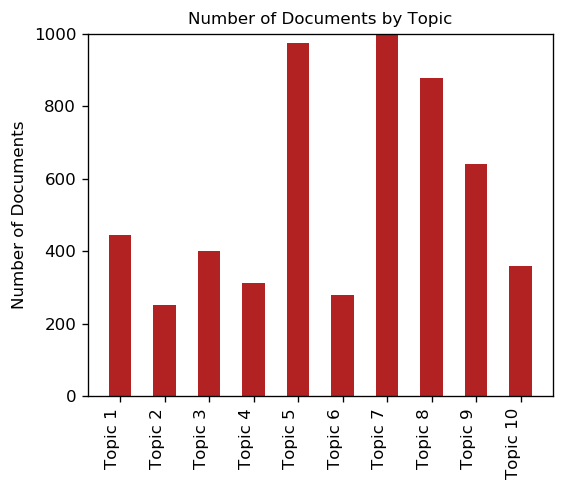

In [51]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1) = plt.subplots(1, figsize=(5, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x+1))
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

plt.setp(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()